In [1]:
import pandas as pd
df = pd.read_csv('/Users/Santosh/Desktop/Ban 612/day 4/practice/complaints.csv') # renamed from the csv file within train.csv.zip on Kaggle

df.info(verbose=True)  # when "=True", Prints information of all columns.

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650772 entries, 0 to 4650771
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 638.

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-02-01,Mortgage,Conventional home mortgage,Trouble during payment process,Payment process,NaN,NaN,SN SERVICING CORPORATION,DC,20019,NaN,NaN,Web,2024-02-01,Closed with explanation,Yes,NaN,8258131
1,2024-02-01,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MI,48146,NaN,Consent not provided,Web,2024-02-01,Closed with explanation,Yes,NaN,8261771
2,2024-02-01,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,92843,NaN,NaN,Web,2024-02-01,In progress,Yes,NaN,8261661
3,2024-02-01,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32256,NaN,NaN,Web,2024-02-01,In progress,Yes,NaN,8261668
4,2024-02-01,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33607,NaN,NaN,Web,2024-02-01,In progress,Yes,NaN,8261671


In [2]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Complaint ID'], dtype='object')
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')


In [3]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650772 entries, 0 to 4650771
Data columns (total 17 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
dtypes: object(17)
memory usage: 603.2+ MB


In [4]:
df[numeric_cols].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650772 entries, 0 to 4650771
Data columns (total 1 columns):
 #   Column        Dtype
---  ------        -----
 0   Complaint ID  int64
dtypes: int64(1)
memory usage: 35.5 MB


In [5]:
num_missing = df.isna().sum()
num_missing[:17]

Date received                         0
Product                               0
Sub-product                      235290
Issue                                 0
Sub-issue                        726919
Consumer complaint narrative    2974948
Company public response         2447686
Company                               0
State                             44202
ZIP code                          30223
Tags                            4192305
Consumer consent provided?       937161
Submitted via                         0
Date sent to company                  0
Company response to consumer          8
Timely response?                      0
Consumer disputed?              3882455
dtype: int64

In [6]:
pct_missing = df.isna().mean()
pct_missing[:17]

Date received                   0.000000
Product                         0.000000
Sub-product                     0.050592
Issue                           0.000000
Sub-issue                       0.156301
Consumer complaint narrative    0.639668
Company public response         0.526297
Company                         0.000000
State                           0.009504
ZIP code                        0.006498
Tags                            0.901421
Consumer consent provided?      0.201507
Submitted via                   0.000000
Date sent to company            0.000000
Company response to consumer    0.000002
Timely response?                0.000000
Consumer disputed?              0.834798
dtype: float64

<Axes: >

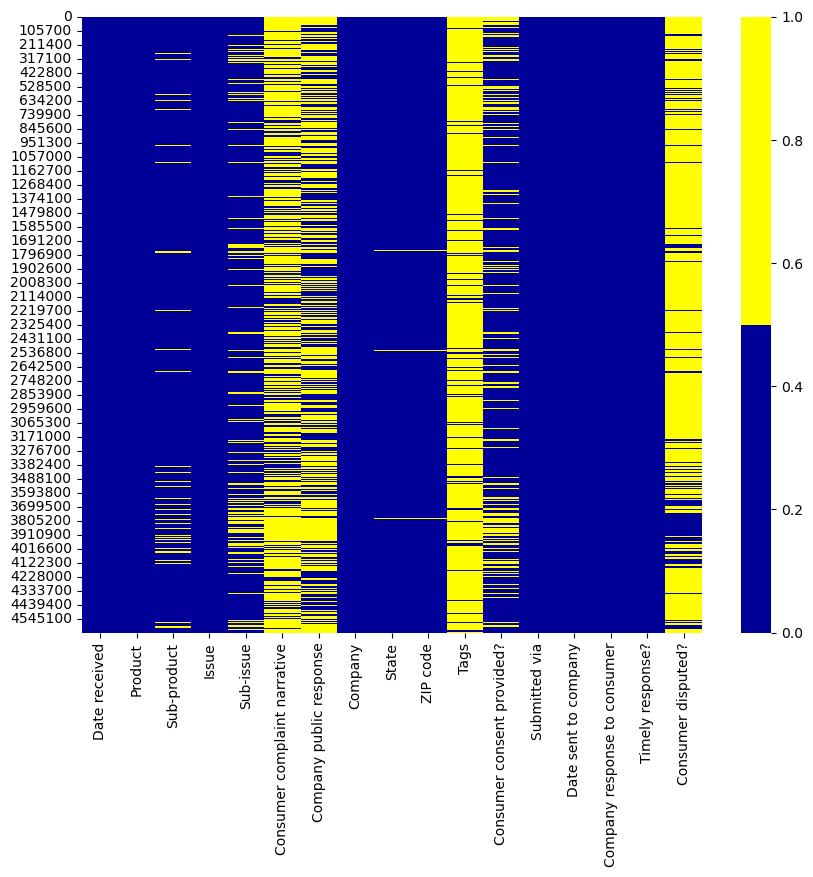

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns[:17]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

In [8]:
#!pip install missingno
import missingno as msno

<Axes: >

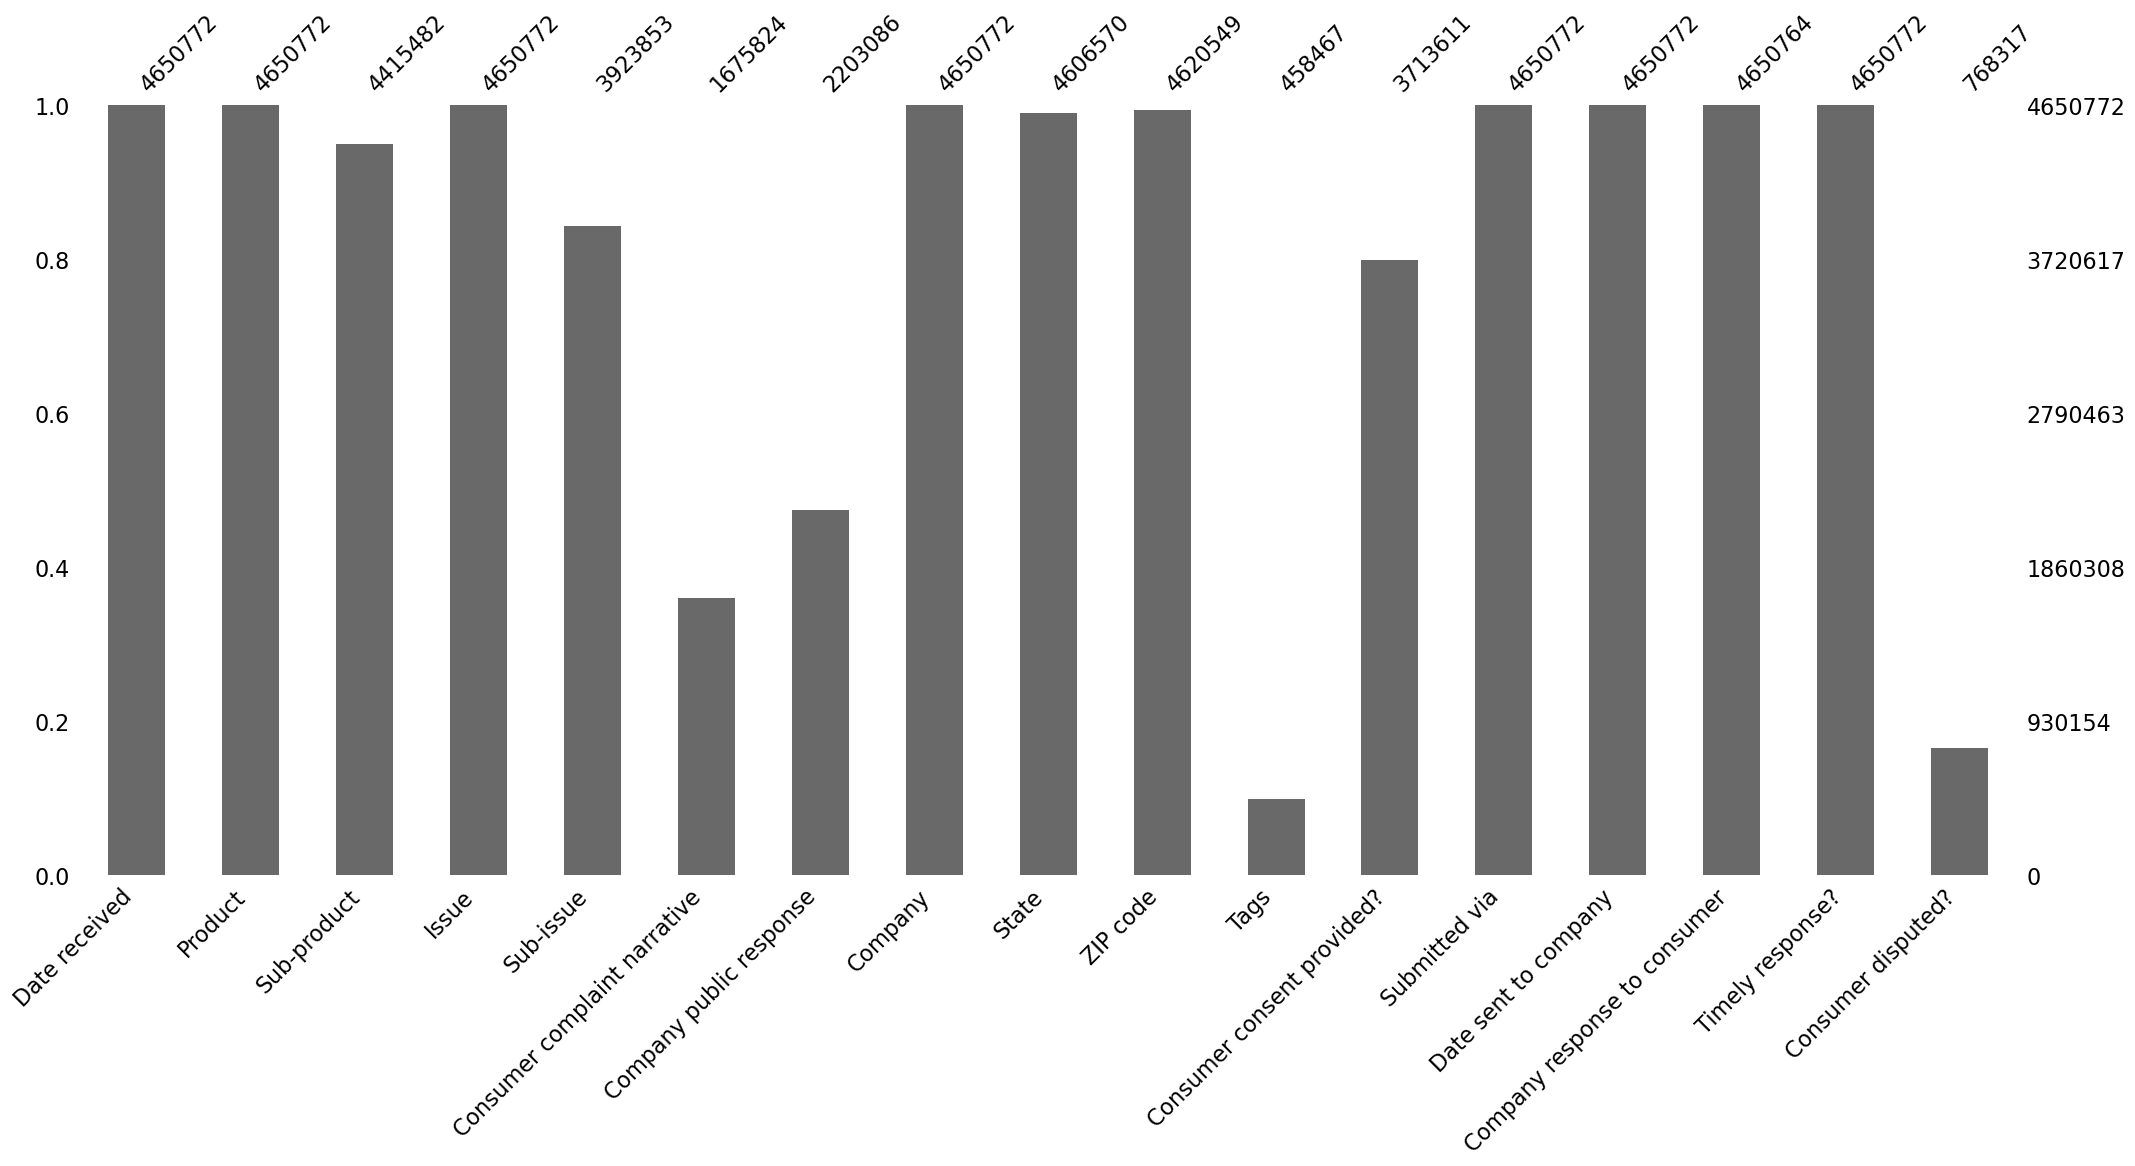

In [9]:
msno.bar(df.iloc[:, :17])

<Axes: >

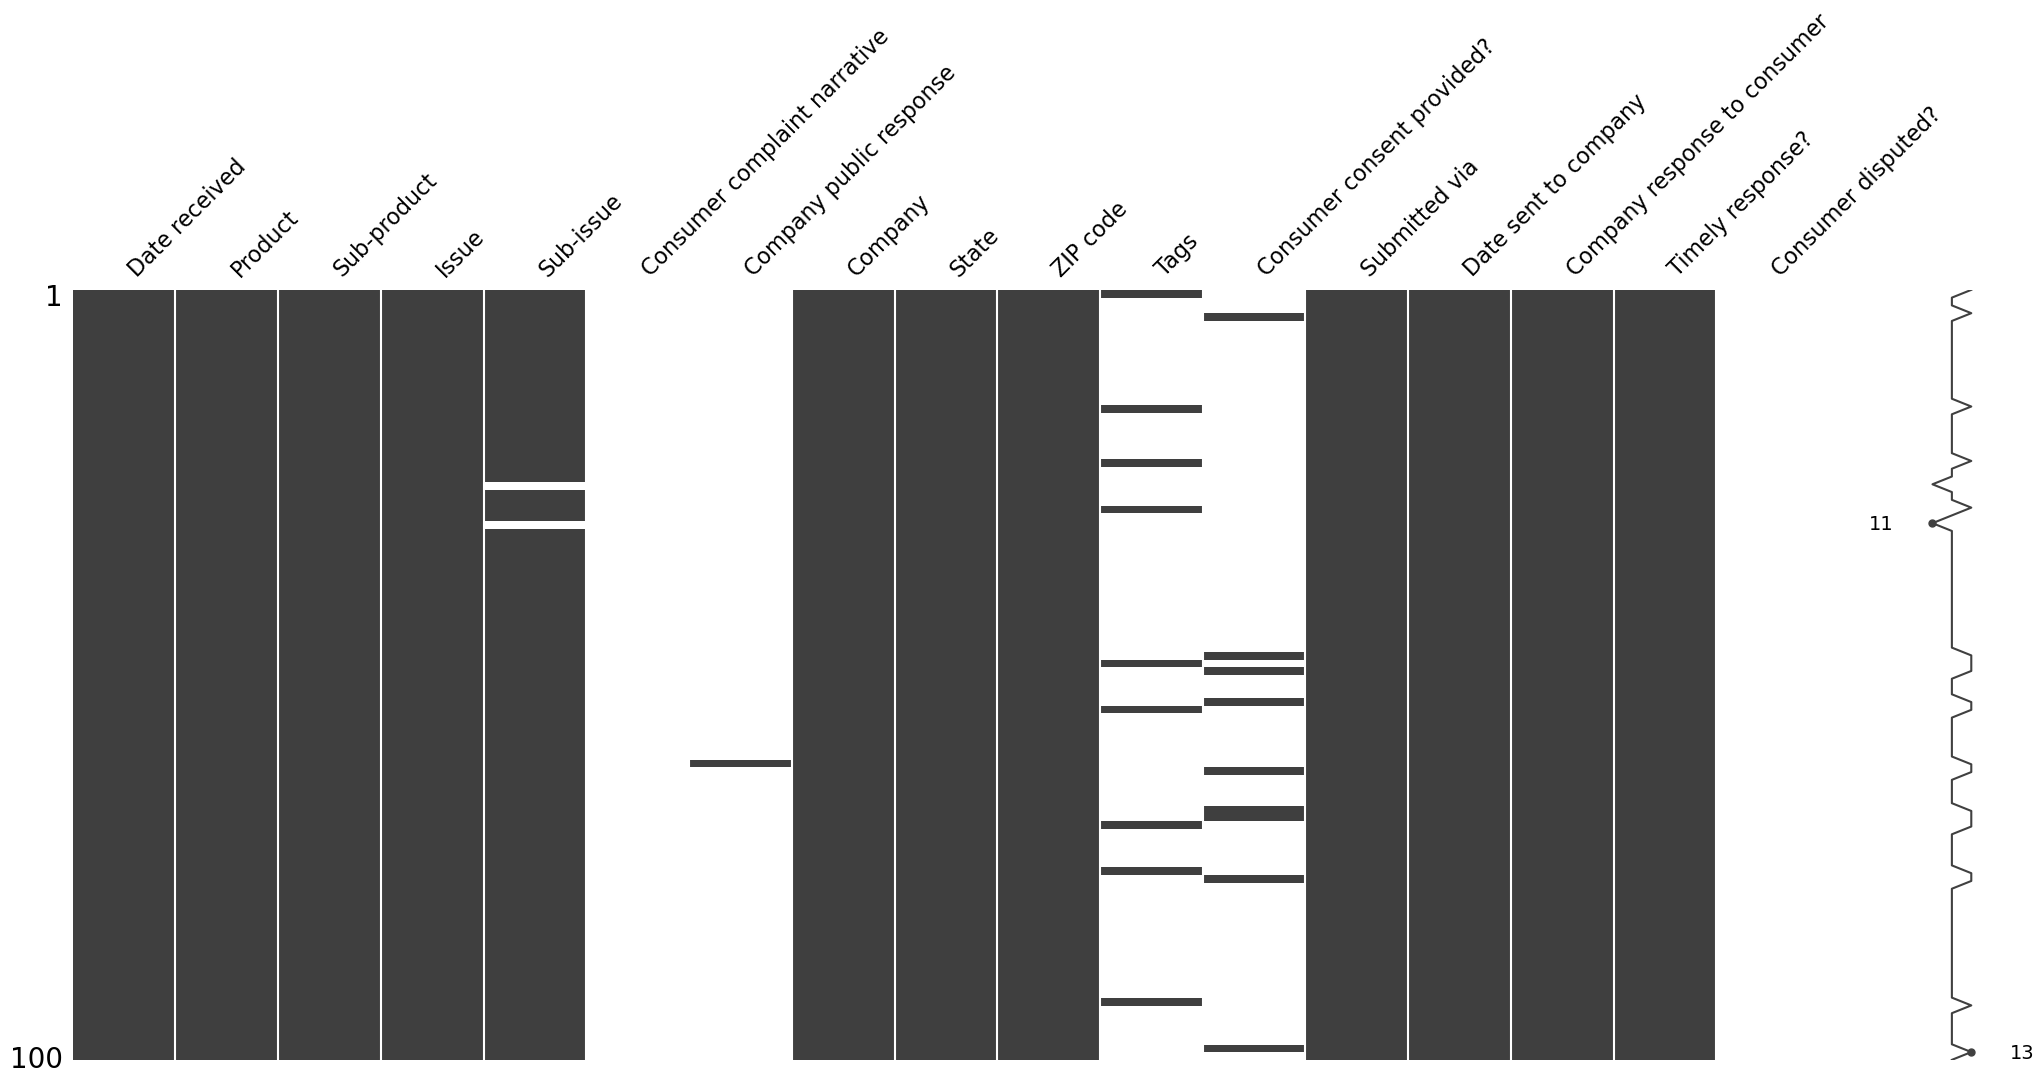

In [10]:
msno.matrix(df.iloc[29000:29100, :17])

<Axes: >

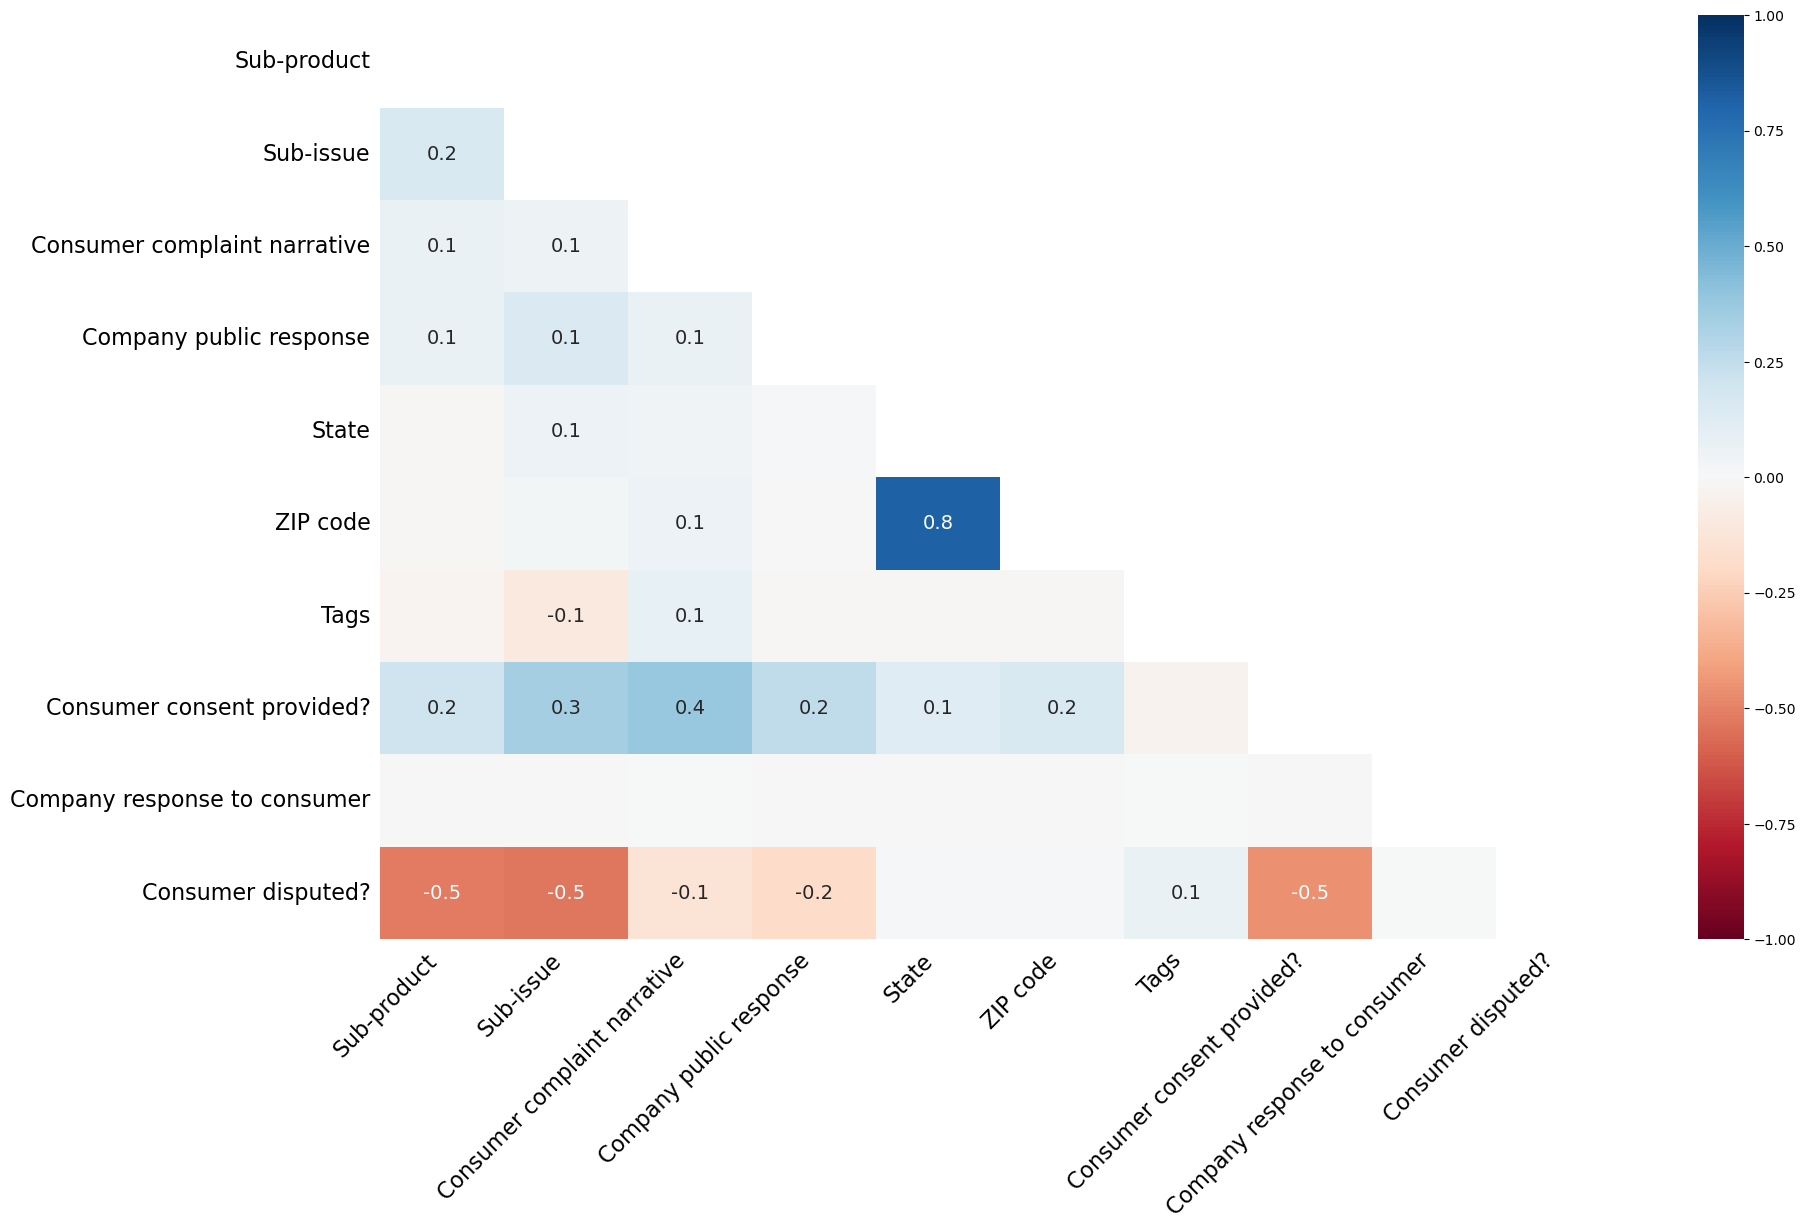

In [11]:
msno.heatmap(df.iloc[:, :17])

<Axes: >

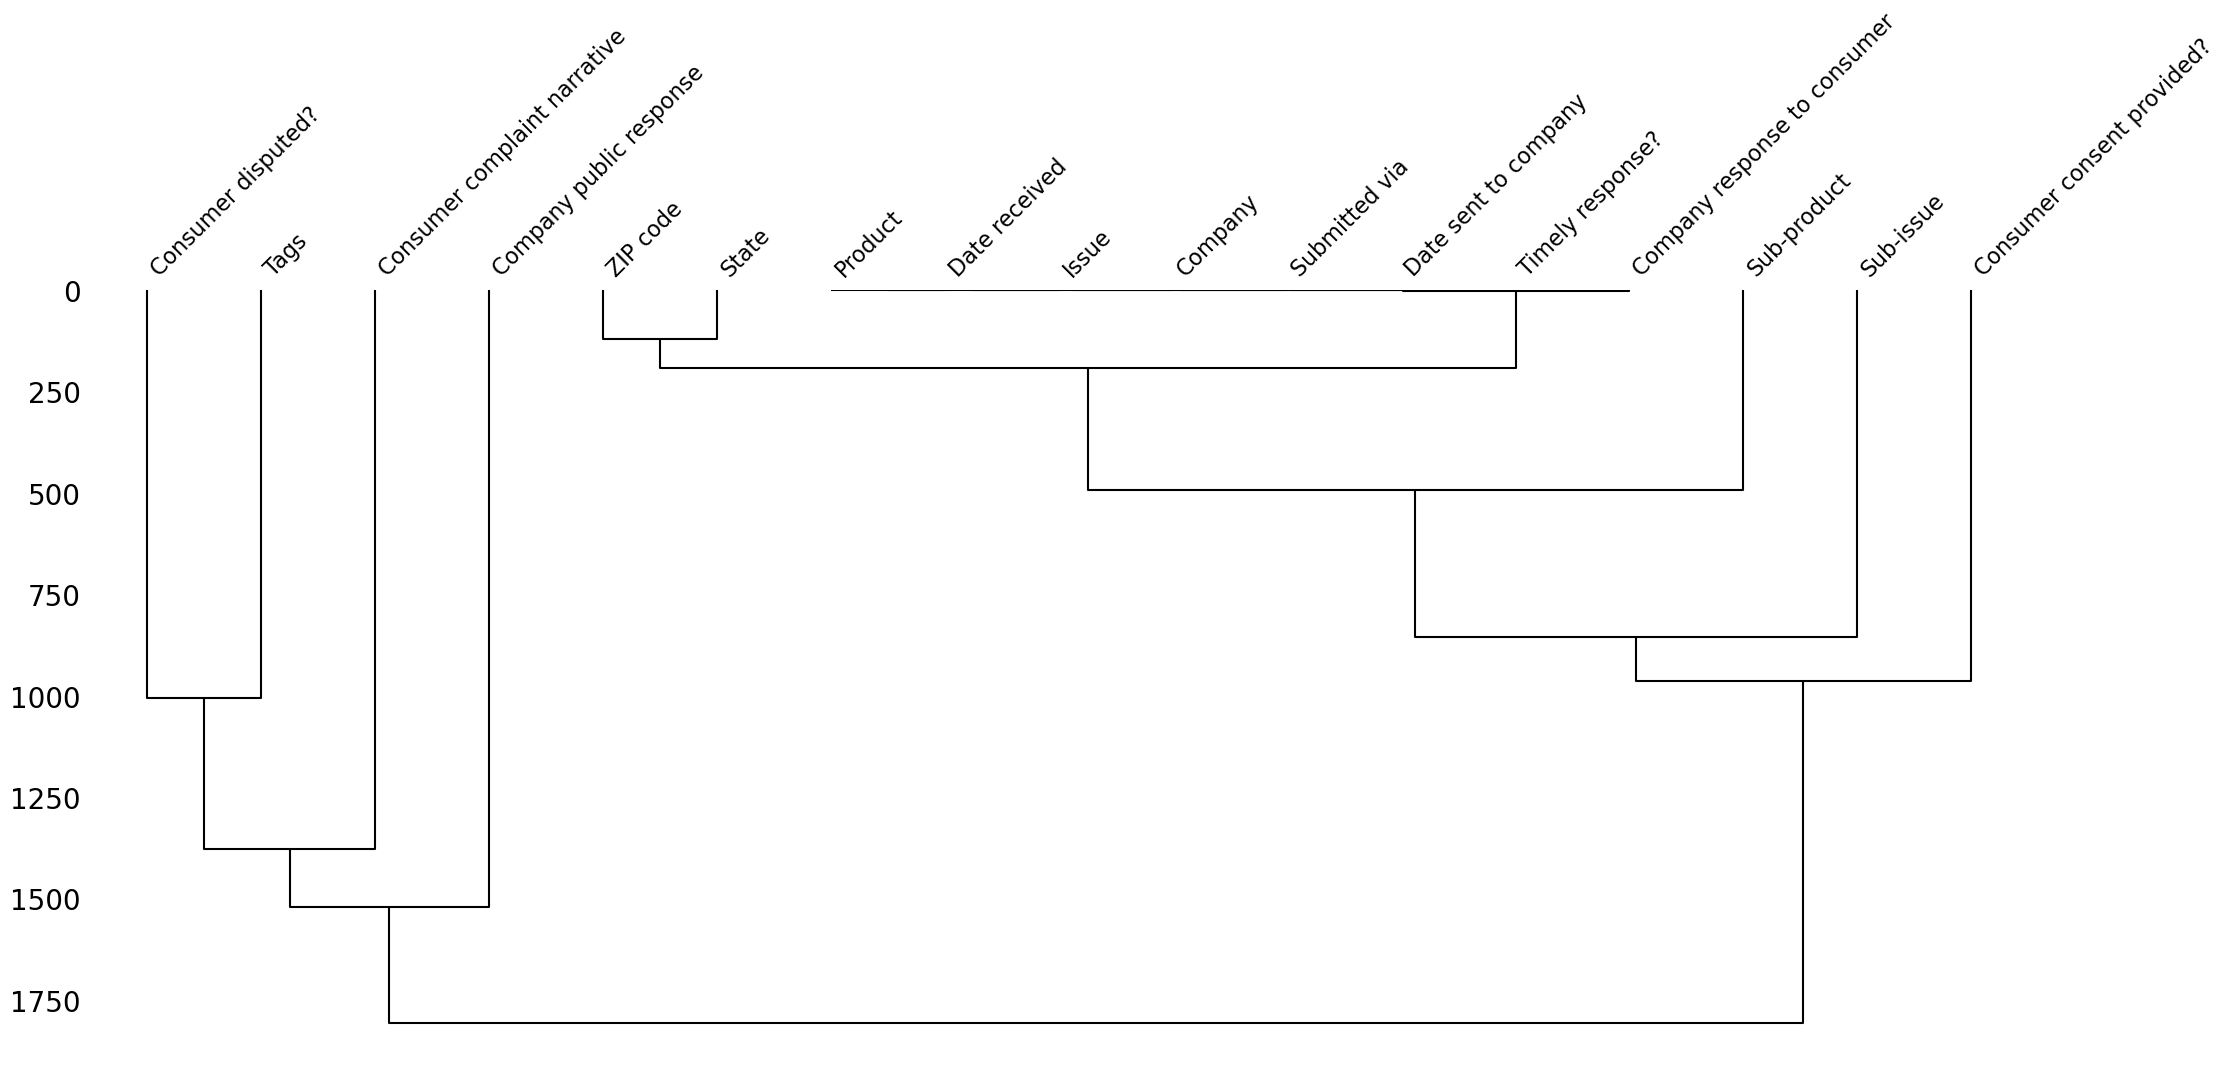

In [12]:
msno.dendrogram(df.iloc[:, :17])

<Axes: >

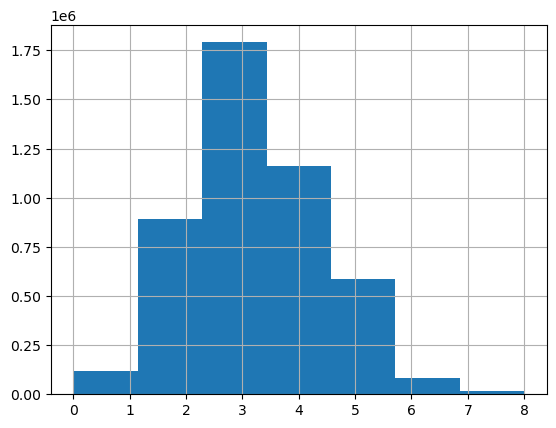

In [13]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=7)

In [14]:
pct_missing[pct_missing > .3]

Consumer complaint narrative    0.639668
Company public response         0.526297
Tags                            0.901421
Consumer disputed?              0.834798
dtype: float64